In [ ]:
import pandas as pd

def tokenize_text(text):
    """
    Tokenize the given text by splitting on spaces and common punctuation.
    Handles Unicode characters like Telugu script.
    """

    punctuations = ".,!?;:\"'()-"
    # Replace punctuations with spaces
    for p in punctuations:
        text = text.replace(p, " ")
    # Remove \u200c (Zero Width Non-Joiner)
    text = text.replace("\u200c", "")
    # Split on spaces and strip whitespace
    tokens = [word.strip() for word in text.split() if word.strip()]
    return tokens

# Load the dataset
file_path = "Telugu_dataset.csv"
df = pd.read_csv(file_path)


df["title_tokens"] = df["title"].apply(tokenize_text)
df["text_tokens"] = df["text"].apply(tokenize_text)

# Save the updated dataset
output_file_path = "dataset_with_tokens.csv"
df.to_csv(output_file_path, index=False)

print(f"Tokenized dataset saved to {output_file_path}")


Tokenized dataset saved to dataset_with_tokens.csv


In [ ]:
import pandas as pd

# Suffix-based heuristics for POS tagging
pos_rules = {
    'noun': [
        'లు', 'ము', 'ని', 'గం', 'త', 'పు', 'కము', 'త్తి', 'యం',
        'వి', 'నీ', 'క', 'మ', 'ష్', 'న్', 'గం', 'వి', 'తి', 'డం',
        'వరం', 'లాలు', 'వా', 'పాలు', 'సం', 'నికి', 'డ్లు', 'లు', 'తం',
        'రులు', 'ములు'
    ],
    'verb': [
        'తున్న', 'తాడు', 'డం', 'చడం', 'వడం', 'టడం', 'తివి', 'తారు',
        'చిన', 'కా', 'లిన', 'డు', 'డా', 'వా', 'తు', 'లేదు', 'లేకుండా',
        'టాడు', 'చాడు', 'స్తూ', 'స్తారు', 'టువంటి', 'చేశారు', 'లని',
        'వేశారు', 'తుందని', 'మంటూ', 'డుతో', 'చేస్తున్న', 'తున్నారు'
    ],
    'adj': [
        'మైన', 'గా', 'దైన', 'తైన', 'తో', 'టి', 'కి', 'మా', 'ది',
        'తైన', 'దవాలి', 'మైనది', 'గల', 'గలవాడు', 'చేసిన', 'అన్నీ',
        'గలది', 'వంటి', 'మంచి', 'పైన', 'లేని', 'చిన్న', 'పెద్ద',
        'తక్కువ', 'ఉన్న', 'తగిన', 'బాగా', 'గలవారు', 'గలవని', 'గలదు'
    ]
}

def pos_tag(tokens):
    """
    Tag tokens with POS based on suffix rules and length constraints.
    """
    tags = []
    for token in tokens:
        if len(token) > 3:
            for pos, suffixes in pos_rules.items():
                if any(token.endswith(suffix) for suffix in suffixes):
                    tags.append((token, pos))
                    break
    return tags

def count_pos_tags(pos_tags, pos_type):
    """
    Count the number of tokens tagged as a specific POS type.
    """
    return sum(1 for _, pos in pos_tags if pos == pos_type)

# Load dataset
file_path = "dataset_with_tokens.csv"
df = pd.read_csv(file_path)

# Ensure tokens are treated as lists
df['title_tokens'] = df['title_tokens'].apply(eval)
df['text_tokens'] = df['text_tokens'].apply(eval)

# POS tagging for title_tokens and text_tokens
df['title_pos_tags'] = df['title_tokens'].apply(pos_tag)
df['text_pos_tags'] = df['text_tokens'].apply(pos_tag)

# Add new columns for counts
df['no_of_nouns'] = df['text_pos_tags'].apply(lambda x: count_pos_tags(x, 'noun'))
df['no_of_verbs'] = df['text_pos_tags'].apply(lambda x: count_pos_tags(x, 'verb'))
df['no_of_adjectives'] = df['text_pos_tags'].apply(lambda x: count_pos_tags(x, 'adj'))

# # Save the updated DataFrame to a new CSV file
# output_file_path = "updated_dataset.csv"
# df.to_csv(output_file_path, index=False)

# Verify the updated DataFrame
print(df[['title_pos_tags','text_pos_tags']].head())


df_to_save = df.drop(columns=['title_pos_tags', 'text_pos_tags'])

output_file_path = "updated_dataset.csv"
df_to_save.to_csv(output_file_path, index=False)

                            title_pos_tags  \
0           [(దిశకి, adj), (అంకితం, noun)]   
1                          [(ఈనాడు, verb)]   
2  [(కోసం, noun), (పద్దెనిమిదేళ్లు, noun)]   
3                    [(కనిష్ఠానికి, noun)]   
4                         [(సోదాలు, noun)]   

                                       text_pos_tags  
0  [(నేని, noun), (హీరోగా, adj), (నటిస్తూ, verb),...  
1                               [(పాకిస్థాన్, noun)]  
2  [(కథానాయకుడిగా, adj), (నటించిన, verb), (సాయిపల...  
3  [(శాతం, noun), (ఆధారిత, noun), (కనిష్ఠానికి, n...  
4  [(నిషేధిత, noun), (పోలీసులు, noun), (సోదాలు, n...  


In [ ]:
import ast
import pandas as pd

#stop words
stop_words = {
    'ఇది', 'ఒక', 'అతను', 'ఆమె', 'వారు', 'ఈ', 'తో', 'పై',
    'కీ', 'కోసం', 'నేను', 'అది', 'మీ', 'మన', 'మీరు', 'తాను',
    'అందు', 'అందున', 'అంటే', 'అప్పుడు', 'అలాగా', 'ఎలా',
    'ఏది', 'ఎవరు', 'ఎప్పుడు', 'చేత', 'కాని', 'మరియు', 'లేకపోతే',
    'కూడా', 'ఇంకా', 'చేసి', 'కింద', 'ముందు', 'తర్వాత', 'అక్కడ',
    'ఇక్కడ', 'ఎక్కడ', 'పక్కన', 'వెంట', 'వల్ల', 'అది', 'ఎవరైనా',
    'ఎవరూ', 'ఎక్కడైనా', 'ఎప్పుడు', 'తరువాత', 'అలాగే', 'ఎవరికి',
    'ఎవ్వరూ', 'ఒకప్పుడు', 'మళ్ళీ', 'సమయం', 'ప్రతి', 'కొంత',
    'ఎవరి', 'ఒకటి', 'రెండు', 'మూడు', 'ఎవరికి', 'ఎవరిదీ', 'ఒకలా',
    'ఎవరో', 'అక్కడి', 'అప్పుడే', 'పైన', 'పైనుంచి', 'దగ్గరగా',
    'ఎప్పుడు', 'ఇక్కడి', 'ఇదివరకు', 'ముందుగా', 'వెంటనే', 'ఎలా',
    'వాటితో', 'వీటికి', 'వీటిలో', 'ఇప్పుడు', 'ఎందుకు', 'అందరూ',
    'అప్పుడు', 'ఎక్కడో', 'ఏదో', 'కోసం', 'అంతే',
    'చేశారు', 'అవును', 'ఇక్కడ', 'కాబట్టి', 'ఎవరినీ', 'తర్వాత',
    'ఎవరికీ', 'ఇప్పటికే', 'వాస్తవం', 'ఉండరు', 'కొద్ది', 'వీటిని',
    'తరువాత', 'ఎవరూ', 'మరి', 'చాలా', 'కానికప్పుడు', 'చేయాలి',
    'పడింది', 'ఉంటున్నాయి', 'ఉన్నది', 'వంటి', 'ఆ', 'ఉంటుంది',
    'మరియు', 'అయితే', 'వాడు', 'తరచూ', 'తీసుకున్నారు', 'ఇంకెలా',
    'ఉంటారు', 'ఇక', 'ఇలాంటిది', 'అందుకే', 'వాళ్లు', 'ఎవరికైనా',
    'గాని', 'ఉన్న', 'ఇది', 'ఎవరు', 'ఎలాగో', 'అసలు', 'పదవి',
    'వారు', 'ఇంకా', 'అందులో', 'ఎక్కడో', 'పైన', 'అవి', 'నాలుగు',
    'కాని', 'వీళ్ళు', 'మీరే', 'చేయగలరు', 'మాత్రం', 'ఎవరైతే',
    'తీసుకుని', 'నిజం', 'ఎప్పుడు', 'ఉంటున్నాడు', 'కొంచెం', 'ఇలా',
    'వాటిని', 'ఎక్కడికి', 'పైనే', 'అని', 'కొత్త', 'ఎందుకు',
    'చాల్లా', 'అతను', 'నిజంగా', 'ఇప్పుడు', 'వాటితో', 'పైనుంచి',
    'ముందు', 'కలిసి', 'ఎవరితో', 'కానీ', 'ఎక్కడైనా', 'ఎక్కడ',
    'ఉంది', 'చేసింది', 'ఎవరో', 'వాటి', 'కోసం', 'ఫలితంగా',
    'వీటి', 'అనుకున్న', 'నువ్వు', 'ఎప్పుడూ', 'పైకి', 'ఇకపై',
    'కాదు', 'నేను', 'అందువల్ల', 'చేయగలిగింది', 'గురించి', 'పై',
    'ప్రకారం', 'అనుగుణంగా', 'అడ్డంగా', 'మళ్ళీ', 'వ్యతిరేకంగా',
    'అనుమతించు', 'అనుమతిస్తుంది', 'దాదాపు', 'మాత్రమే', 'వెంట',
    'కూడా', 'వద్ద', 'మధ్య', 'ఒక', 'మరొక', 'ఏ', 'ఎవరో ఒకరు',
    'ఏమైనప్పటికి', 'ఎవరైనా', 'ఏదైనా', 'వేరుగా', 'కనిపిస్తాయి',
    'మెచ్చుకో', 'తగిన', 'ఉన్నారు', 'చుట్టూ', 'గా', 'ఒక ప్రక్కన',
    'అడగండి', 'అడగడం', 'సంబంధం', 'అందుబాటులో', 'దూరంగా', 'గారు'
}


# Function to remove non-Telugu characters
def remove_non_telugu(text):
    return ''.join([char for char in text if '\u0C00' <= char <= '\u0C7F'])

# Function to remove stop words
def remove_stop_words(tokens):
    return [token for token in tokens if token not in stop_words]

# Load the dataset
file_path = "updated_dataset.csv"
dataset = pd.read_csv(file_path)


dataset['title_tokens'] = dataset['title_tokens'].apply(ast.literal_eval)
dataset['text_tokens'] = dataset['text_tokens'].apply(ast.literal_eval)

# Remove non-Telugu characters from the tokens
dataset['title_tokens'] = dataset['title_tokens'].apply(lambda tokens: [remove_non_telugu(token) for token in tokens])
dataset['text_tokens'] = dataset['text_tokens'].apply(lambda tokens: [remove_non_telugu(token) for token in tokens])

# Apply stop word removal
dataset['title_tokens'] = dataset['title_tokens'].apply(remove_stop_words)
dataset['text_tokens'] = dataset['text_tokens'].apply(remove_stop_words)

print(dataset[['title_tokens', 'text_tokens']].head())

output_file_path = "processed_dataset.csv"
dataset.to_csv(output_file_path, index=False)


                                title_tokens  \
0                            [దిశకి, అంకితం]   
1                       [ప్రపంచకప్లో, ఈనాడు]   
2        [ఆయన, పద్దెనిమిదేళ్లు, ఎదురుచూశాను]   
3  [, నెలల, కనిష్ఠానికి, టోకు, ద్రవ్యోల్బణం]   
4   [మావోయిస్టు, సానుభూతిపరుడి, ఇంట, సోదాలు]   

                                         text_tokens  
0  [నేని, శేఖర్, హీరోగా, నటిస్తూ, తెరకెక్కిస్తున్...  
1  [పాకిస్థాన్, , బంగ్లాదేశ్, మ, , నుంచి, స్టార్స...  
2  [సూర్య, కథానాయకుడిగా, నటించిన, చిత్రం, ఎన్జికే...  
3  [గత, నెలలో, , , శాతం, దిల్లీ, టోకు, ధరల, సూచీ,...  
4  [నల్లకుంట, న్యూస్టుడే, నిషేధిత, మావోయిస్టు, పా...  


In [ ]:
import pandas as pd

# Class for lemmatization and stemming
class TeluguLemmatizerStemmer:
    def __init__(self, lemma_dict=None):
        self.lemma_dict = lemma_dict if lemma_dict else {}
        self.suffixes = ["లు", "కు", "ని", "ను", "తో", "గా", "కి", "ను", "పై", "వరకు", "లో"]

    def lemmatize_or_stem(self, word):
        # Check if the word is in the lemma dictionary
        if word in self.lemma_dict:
            return self.lemma_dict[word]

        # If the word ends with a known suffix, remove it
        for suffix in self.suffixes:
            if word.endswith(suffix):
                return word[:-len(suffix)]

        # If no match is found, strip the last two characters
        if len(word) > 2:
            return word[:-2]

        # If the word is too short to strip, return it as is
        return word

# Define Telugu Lemma dictionary
telugu_lemma_dict = {
    "పుస్తకాలు": "పుస్తకం",
    "చిన్నది": "చిన్న",
    "పిల్లలు": "పిల్ల",
    "గెలిచింది": "గెలు",
    "నడిచింది": "నడుకు",
    "మామిడి": "మామిడి",
    "గుడికి": "గుడి",
    "చెట్లతో": "చెట్టు",
    "పిల్లను": "పిల్ల",
    "వాగు": "వాగు",
    "విలువలు": "విలువ",
    "సమస్యలు": "సమస్య",
    "ఉపన్యాసాలు": "ఉపన్యాసం",
    "పెళ్లికి": "పెళ్లి",
    "పద్ధతులతో": "పద్ధతి",
    "పదార్థాలు": "పదార్థం",
    "అనుభవాలు": "అనుభవం",
    "అభిప్రాయాలు": "అభిప్రాయం",
    "అమ్మకాలు": "అమ్మకం",
    "ఆటలు": "ఆట",
    "ఆదర్శాలు": "ఆదర్శం",
    "ఆలోచనలు": "ఆలోచన",
    "ఆశయాలు": "ఆశయం",
    "ఆశలు": "ఆశ",
    "ఉత్సవాలు": "ఉత్సవం",
    "ఉద్దేశాలు": "ఉద్దేశం",
    "ఉద్యోగులు": "ఉద్యోగి",
    "ఉపకరణాలు": "ఉపకరణం",
    "ఉపకారాలు": "ఉపకారం",
    "ఉపన్యాసాలు": "ఉపన్యాసం",
    "ఉపాధ్యాయులు": "ఉపాధ్యాయి",
    "ఉపాయాలు": "ఉపాయం",
    "కథనాలు": "కథనం",
    "కథలు": "కథ",
    "కర్తవ్యాలు": "కర్తవ్యము",
    "కలలు": "కల",
    "కార్యక్రమాలు": "కార్యక్రమం",
    "కార్యాలు": "కార్యం",
    "కాళ్లు": "కాలు",
    "గుడికి": "గుడి",
    "గృహాలు": "గృహం",
    "గెలిచింది": "గెలు",
    "గ్రామాలు": "గ్రామం",
    "చక్రాలు": "చక్రం",
    "చర్చలు": "చర్చ",
    "చర్యలు": "చర్య",
    "చిత్రాలు": "చిత్రం",
    "చిన్నది": "చిన్న",
    "చిరు": "చిరు",
    "చెట్లతో": "చెట్టు",
    "జ్ఞాపకాలు": "జ్ఞాపకం",
    "తరగతులు": "తరగతి",
    "నటులు": "నటుడు",
    "నడకలు": "నడక",
    "నడిచింది": "నడుకు",
    "నాటకాలు": "నాటకం",
    "నిబంధనలు": "నిబంధన",
    "నియమాలు": "నియమం",
    "నిర్ణయాలు": "నిర్ణయం",
    "నిర్దేశాలు": "నిర్దేశం",
    "నిర్వాహణలు": "నిర్వాహణ",
    "నివేదికలు": "నివేదిక",
    "న్యాయమూర్తులు": "న్యాయమూర్తి",
    "పండితులు": "పండితుడు",
    "పండుగలు": "పండుగ",
    "పండ్లు": "పండు",
    "పట్టణాలు": "పట్టణం",
    "పదార్థాలు": "పదార్థం",
    "పద్ధతులతో": "పద్ధతి",
    "పనులు": "పని",
    "పరిధులు": "పరిధి",
    "పరిశీలనలు": "పరిశీలన",
    "పరిస్థితులు": "పరిస్థితి",
    "పాటలు": "పాట",
    "పాటించండి": "పాటు",
    "పాఠశాలలు": "పాఠశాల",
    "పాదాలు": "పాదం",
    "పిల్లకాడు": "పిల్ల",
    "పిల్లడాలు": "పిల్ల",
    "పిల్లను": "పిల్ల",
    "పిల్లలు": "పిల్ల",
    "పుస్తకాలు": "పుస్తకం",
    "పెదవులు": "పెదవి",
    "పెళ్లికి": "పెళ్లి",
    "ప్రకటనలు": "ప్రకటన",
    "ప్రత్యామ్నాయాలు": "ప్రత్యామ్నాయం",
    "ప్రదేశాలు": "ప్రదేశం",
    "ప్రభుత్వాలు": "ప్రభుత్వం",
    "ప్రయత్నాలు": "ప్రయత్నం",
    "ప్రయోజనాలు": "ప్రయోజనం",
    "ప్రశ్నలు": "ప్రశ్న",
    "ప్రాజెక్టులు": "ప్రాజెక్టు",
    "ప్రారంభాలు": "ప్రారంభం",
    "ప్రేమలు": "ప్రేమ",
    "బంగారాలు": "బంగారం",
    "బట్టలు": "బట్టు",
    "భాషలు": "భాష",
    "మాటలు": "మాట",
    "మామిడి": "మామిడి",
    "మొక్కలు": "మొక్క",
    "రుచులు": "రుచి",
    "వంటలు": "వంట",
    "వాగు": "వాగు",
    "వారసులు": "వారసుడు",
    "వార్తలు": "వార్త",
    "విచారణలు": "విచారణ",
    "విద్యలు": "విద్య",
    "విద్యార్థులు": "విద్యార్థి",
    "విభాగాలు": "విభాగం",
    "విలువలు": "విలువ",
    "వివరణలు": "వివరణ",
    "వివాదాలు": "వివాదం",
    "విషయాలు": "విషయం",
    "వీధులు": "వీధి",
    "వృక్షాలు": "వృక్షం",
    "వ్యాఖ్యలు": "వ్యాఖ్య",
    "సంఘటనలు": "సంఘటన",
    "సంఘాలు": "సంఘం",
    "సందర్భాలు": "సందర్భం",
    "సందేహాలు": "సందేహం",
    "సంపదలు": "సంపద",
    "సంప్రదాయాలు": "సంప్రదాయం",
    "సంబంధాలు": "సంబంధం",
    "సంస్కృతులు": "సంస్కృతి",
    "సమయాలు": "సమయం",
    "సమస్యలు": "సమస్య",
    "సమాచారాలు": "సమాచారం",
    "సమాధానాలు": "సమాధానం",
    "సమావేశాలు": "సమావేశం",
    "సరుకులు": "సరుకు",
    "సహాయాలు": "సహాయం",
    "సిద్ధాంతాలు": "సిద్ధాంతం",
    "సూచనలు": "సూచన",
    "సూత్రాలు": "సూత్రం",
    "సేవలు": "సేవ",
    "స్నేహితులు": "స్నేహితుడు",
}

# Function to apply lemmatization on each token
def lemmatize_tokens(tokens, lemmatizer):
    return [lemmatizer.lemmatize_or_stem(token) for token in tokens]

# Load the dataset
processed_data = pd.read_csv('processed_dataset.csv')


lemmatizer_stemmer = TeluguLemmatizerStemmer(telugu_lemma_dict)


processed_data['text_tokens'] = processed_data['text_tokens'].apply(lambda tokens: lemmatize_tokens(eval(tokens), lemmatizer_stemmer))
processed_data['title_tokens'] = processed_data['title_tokens'].apply(lambda tokens: lemmatize_tokens(eval(tokens), lemmatizer_stemmer))

# Save the updated dataset to a new CSV file
processed_data.to_csv('lemmatized_processed_dataset.csv', index=False)
print(processed_data[['title_tokens','text_tokens']].head())


                        title_tokens  \
0                        [దిశ, అంకి]   
1                   [ప్రపంచకప్, ఈనా]   
2      [ఆ, పద్దెనిమిదేళ్, ఎదురుచూశా]   
3  [, నె, కనిష్ఠాని, టో, ద్రవ్యోల్బ]   
4   [మావోయిస్, సానుభూతిపరు, ఇ, సోదా]   

                                         text_tokens  
0  [నే, శేఖ, హీరో, నటిస్, తెరకెక్కిస్తున, చిత్, అ...  
1  [పాకిస్థా, , బంగ్లాదే, మ, , నుం, స్టార్స్పోర్ట...  
2  [సూర, కథానాయకుడి, నటించ, చిత్, ఎన్జి, రకుల్ప్ర...  
3  [గత, నెల, , , శా, దిల్, టో, ధ, సూ, ఆధార, డబ్ల్...  
4  [నల్లకు, న్యూస్టు, నిషేధ, మావోయిస్, పార్, సాను...  


In [ ]:
!pip install https://github.com/explosion/spacy-models/releases/download/xx_ent_wiki_sm-3.0.0/xx_ent_wiki_sm-3.0.0.tar.gz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 31.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 105.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 659.5/659.5 kB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 7.4 MB/s eta 0:00:00
  Created wheel for xx_ent_wiki_sm: filename=xx_ent_wiki_sm-3.0.0-py3-none-any.whl size=15613359 sha256=083bfd7acdbd1a894e711d734838adaafeab2dd749461e7a004690897be04b29
  Stored in directory: /root/.cache/pip/wheels/f9/45/c5/bf3857bbc7a75947858deb01f1a832f8d204de3b85ba012a55
Successfully built xx_ent_wiki_sm
  Attempting

In [ ]:
import spacy
import pandas as pd

# Load spaCy multilingual model
nlp = spacy.load("xx_ent_wiki_sm")

# Function to extract entity counts
def extract_entity_counts(tokens):
    # Convert tokens back to text for spaCy
    text = " ".join(eval(tokens))  # `eval` is used to convert stringified lists into actual lists
    doc = nlp(text)
    # Count different entity types
    num_persons = sum(1 for ent in doc.ents if ent.label_ == "PER")
    num_locations = sum(1 for ent in doc.ents if ent.label_ == "LOC")
    num_organizations = sum(1 for ent in doc.ents if ent.label_ == "ORG")
    num_languages = sum(1 for ent in doc.ents if ent.label_ == "LANGUAGE")
    return num_persons, num_locations, num_organizations, num_languages

# Load dataset
df = pd.read_csv('lemmatized_processed_dataset.csv')

# Apply NER on `title_tokens` column
title_entities = df['title_tokens'].apply(extract_entity_counts)
df['num_persons_title'], df['num_locations_title'], df['num_organizations_title'], df['num_languages_title'] = zip(*title_entities)

# Apply NER on `text_tokens` column
text_entities = df['text_tokens'].apply(extract_entity_counts)
df['num_persons_text'], df['num_locations_text'], df['num_organizations_text'], df['num_languages_text'] = zip(*text_entities)


output_file = 'updated_dataset_with_ner.csv'
df.to_csv(output_file, index=False)

print("Updated DataFrame:")
print(df.head())

print(f"DataFrame saved to {output_file}")


/usr/local/lib/python3.10/dist-packages/torch/__init__.py:1144: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:432.)
  _C._set_default_tensor_type(t)


Updated DataFrame:
                                   title  \
0                           దిశకి అంకితం   
1                     ప్రపంచకప్‌లో ఈనాడు   
2   ఆయన కోసం పద్దెనిమిదేళ్లు ఎదురుచూశాను   
3  25 నెలల కనిష్ఠానికి టోకు ద్రవ్యోల్బణం   
4    మావోయిస్టు సానుభూతిపరుడి ఇంట సోదాలు   

                                                text  classification  \
0  \n                \n\nనేని శేఖర్‌ హీరోగా నటిస్...               1   
1  \n                పాకిస్థాన్‌ × బంగ్లాదేశ్‌\nమ...               0   
2  \n                \n\nసూర్య కథానాయకుడిగా నటించ...               0   
3  \n                గత నెలలో 1.08 శాతం\n\nదిల్లీ...               1   
4  \n                నల్లకుంట, న్యూస్‌టుడే: నిషేధ...               0   

                                  title_tokens  \
0                              ['దిశ', 'అంకి']   
1                         ['ప్రపంచకప్', 'ఈనా']   
2          ['ఆ', 'పద్దెనిమిదేళ్', 'ఎదురుచూశా']   
3  ['', 'నె', 'కనిష్ఠాని', 'టో', 'ద్రవ్యోల్బ']   
4     ['మావోయిస్', 'సానుభూతిపరు',

In [ ]:
import csv
from collections import Counter
import math
import ast

def compute_tf(tokens):
    """Compute term frequency for tokens."""
    tf = Counter(tokens)
    total = sum(tf.values())
    return {word: count / total for word, count in tf.items()}

def compute_idf(corpus):
    """Compute inverse document frequency for tokens in the corpus."""
    num_docs = len(corpus)
    idf = {}
    for doc in corpus:
        for word in set(doc):
            idf[word] = idf.get(word, 0) + 1
    return {word: math.log(num_docs / freq) for word, freq in idf.items()}

def compute_tf_idf(tokens, idf):
    """Compute TF-IDF scores."""
    tf = compute_tf(tokens)
    return {word: tf[word] * idf.get(word, 0) for word in tokens}

def load_csv(file_path):
    """Load text tokens and title tokens from the CSV file."""
    rows = []
    with open(file_path, 'r', encoding='utf-8') as file:
        reader = csv.DictReader(file)
        for row in reader:
            # Convert stringified lists into Python lists
            row['text_tokens'] = ast.literal_eval(row['text_tokens'])
            row['title_tokens'] = ast.literal_eval(row['title_tokens'])
            rows.append(row)
    return rows

def save_csv(file_path, rows, fieldnames):
    """Save updated rows to a new CSV file."""
    with open(file_path, 'w', encoding='utf-8', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(rows)

def process_tfidf(file_path, output_path, top_n=5):
    """Process TF-IDF scores and save updated CSV."""
    rows = load_csv(file_path)

    # Combine tokens for IDF computation
    text_tokens = [row['text_tokens'] for row in rows]
    title_tokens = [row['title_tokens'] for row in rows]
    combined_corpus = text_tokens + title_tokens
    idf = compute_idf(combined_corpus)

    # Compute TF-IDF for each row
    for row in rows:
        tfidf_text = compute_tf_idf(row['text_tokens'], idf)
        tfidf_title = compute_tf_idf(row['title_tokens'], idf)

        # Add aggregate scores
        row['tfidf_text_aggregate'] = sum(tfidf_text.values())
        row['tfidf_title_aggregate'] = sum(tfidf_title.values())

        # Add top-N words
        row['top_tfidf_text_words'] = sorted(tfidf_text, key=tfidf_text.get, reverse=True)[:top_n]
        row['top_tfidf_title_words'] = sorted(tfidf_title, key=tfidf_title.get, reverse=True)[:top_n]

    # Save updated data
    fieldnames = list(rows[0].keys())
    save_csv(output_path, rows, fieldnames)

# Usage example
input_file = 'updated_dataset_with_ner.csv'
output_file = 'tfidf_updated_dataset.csv'    #
process_tfidf(input_file, output_file)

# Print a sample of the updated data
import pandas as pd
df = pd.read_csv(output_file)
print(df.head())


                                   title  \
0                           దిశకి అంకితం   
1                     ప్రపంచకప్‌లో ఈనాడు   
2   ఆయన కోసం పద్దెనిమిదేళ్లు ఎదురుచూశాను   
3  25 నెలల కనిష్ఠానికి టోకు ద్రవ్యోల్బణం   
4    మావోయిస్టు సానుభూతిపరుడి ఇంట సోదాలు   

                                                text  classification  \
0  \n                \n\nనేని శేఖర్‌ హీరోగా నటిస్...               1   
1  \n                పాకిస్థాన్‌ × బంగ్లాదేశ్‌\nమ...               0   
2  \n                \n\nసూర్య కథానాయకుడిగా నటించ...               0   
3  \n                గత నెలలో 1.08 శాతం\n\nదిల్లీ...               1   
4  \n                నల్లకుంట, న్యూస్‌టుడే: నిషేధ...               0   

                                  title_tokens  \
0                              ['దిశ', 'అంకి']   
1                         ['ప్రపంచకప్', 'ఈనా']   
2          ['ఆ', 'పద్దెనిమిదేళ్', 'ఎదురుచూశా']   
3  ['', 'నె', 'కనిష్ఠాని', 'టో', 'ద్రవ్యోల్బ']   
4     ['మావోయిస్', 'సానుభూతిపరు', 'ఇ', 'సోదా']   

 

In [ ]:
import csv
from ast import literal_eval
from collections import Counter

def generate_ngrams(tokens, n):
    """Generate n-grams from a list of tokens."""
    ngrams = list(zip(*[tokens[i:] for i in range(n)]))
    return [' '.join(ngram) for ngram in ngrams]

def calculate_ngram_probabilities(ngrams):
    """Calculate probabilities for n-grams."""
    ngram_counts = Counter(ngrams)  # Count occurrences of each n-gram
    total_ngrams = sum(ngram_counts.values())  # Total number of n-grams
    return {ngram: count / total_ngrams for ngram, count in ngram_counts.items()}  # Normalize to probabilities

def load_csv(file_path):
    """Load text tokens and title tokens from the CSV file."""
    text_tokens = []
    title_tokens = []
    with open(file_path, 'r', encoding='utf-8') as file:
        reader = csv.DictReader(file)
        for row in reader:
            # Parse stringified lists into actual lists
            text_tokens.append(literal_eval(row['text_tokens']))
            title_tokens.append(literal_eval(row['title_tokens']))
    return text_tokens, title_tokens

def save_ngrams_with_probs_to_csv(file_path, output_path, text_ngram_probs, title_ngram_probs):
    """Save n-grams and their probabilities into a new CSV file."""
    with open(file_path, 'r', encoding='utf-8') as file:
        reader = csv.DictReader(file)
        fieldnames = reader.fieldnames + ['text_ngram_probs', 'title_ngram_probs']
        rows = []
        for i, row in enumerate(reader):
            row['text_ngram_probs'] = str(text_ngram_probs[i])  # Store n-grams with probabilities as strings
            row['title_ngram_probs'] = str(title_ngram_probs[i])
            rows.append(row)

    with open(output_path, 'w', encoding='utf-8', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(rows)

def generate_ngrams_with_probs_from_csv(file_path, output_path, n):
    """Generate n-grams and their probabilities for text and title tokens from a CSV file."""
    text_tokens, title_tokens = load_csv(file_path)

    # Generate n-grams for text and title tokens
    text_ngrams = [generate_ngrams(tokens, n) for tokens in text_tokens]
    title_ngrams = [generate_ngrams(tokens, n) for tokens in title_tokens]

    # Calculate probabilities for text and title n-grams
    text_ngram_probs = [calculate_ngram_probabilities(ngrams) for ngrams in text_ngrams]
    title_ngram_probs = [calculate_ngram_probabilities(ngrams) for ngrams in title_ngrams]

    save_ngrams_with_probs_to_csv(file_path, output_path, text_ngram_probs, title_ngram_probs)


input_file = 'tfidf_updated_dataset.csv'
output_file = 'ngrams_with_probs_updated_dataset.csv'
n = 2  # Specify the n-gram size (e.g., bigrams)
generate_ngrams_with_probs_from_csv(input_file, output_file, n)

# Print a sample of the updated data
import pandas as pd
df = pd.read_csv(output_file)
print(df[['text_ngram_probs', 'title_ngram_probs']].head())


                                    text_ngram_probs  \
0  {'నే శేఖ': 0.025974025974025976, 'శేఖ హీరో': 0...   
1  {'పాకిస్థా ': 0.16666666666666666, ' బంగ్లాదే'...   
2  {'సూర కథానాయకుడి': 0.006172839506172839, 'కథాన...   
3  {'గత నెల': 0.011299435028248588, 'నెల ': 0.011...   
4  {'నల్లకు న్యూస్టు': 0.010869565217391304, 'న్య...   

                                   title_ngram_probs  
0                                  {'దిశ అంకి': 1.0}  
1                             {'ప్రపంచకప్ ఈనా': 1.0}  
2  {'ఆ పద్దెనిమిదేళ్': 0.5, 'పద్దెనిమిదేళ్ ఎదురుచ...  
3  {' నె': 0.25, 'నె కనిష్ఠాని': 0.25, 'కనిష్ఠాని...  
4  {'మావోయిస్ సానుభూతిపరు': 0.3333333333333333, '...  


In [ ]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Step 1: Load Telugu Dataset
df = pd.read_csv('ngrams_updated_dataset.csv')

# Inspect the data
print("Dataset shape:", df.shape)
print("Columns:", df.columns)

# Step 2: Separate the Target Column
target_column = 'classification'
X = df.drop(columns=[target_column])  # Features
y = df[target_column]  # Target

# Ensure features are numeric
numeric_X = X.select_dtypes(include=[np.number])

# Step 3: Standardize the Dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_X)

# Step 4: Feature Selection
# Method 1: Variance Threshold
variance_selector = VarianceThreshold(threshold=0.1)
selected_features_variance = variance_selector.fit_transform(X_scaled)

# Get the selected feature indices and names
selected_indices_variance = variance_selector.get_support(indices=True)
selected_columns_variance = numeric_X.columns[selected_indices_variance]
print("Selected Features by Variance Threshold:", selected_columns_variance)

# Method 2: Principal Component Analysis (PCA)
pca = PCA(n_components=5)
pca_data = pca.fit_transform(X_scaled)

print("PCA Explained Variance Ratio:", pca.explained_variance_ratio_)

# Method 3: Correlation Matrix
correlation_matrix = pd.DataFrame(X_scaled, columns=numeric_X.columns).corr()

# Remove highly correlated features (threshold = 0.85)
correlated_features = set()
correlation_threshold = 0.85
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            correlated_features.add(correlation_matrix.columns[i])

# Remaining features after removing correlated ones
remaining_features = [col for col in numeric_X.columns if col not in correlated_features]
print("Remaining Features after Correlation Filtering:", remaining_features)

# Final Feature Selection
# Combine or choose the top 5–6 features from the methods above
final_features = list(selected_columns_variance[:6])
print("Final Selected Features:", final_features)


X_final = df[final_features]
y_final = df[target_column]

# Step 7: Save Final Dataset to CSV
final_dataset = pd.concat([X_final, y_final], axis=1)
final_csv_file = 'final_selected_features.csv'
final_dataset.to_csv(final_csv_file, index=False)

print(f"Final dataset saved to {final_csv_file}")

# Print shapes of final datasets
print("Final Features Shape:", X_final.shape)
print("Target Shape:", y_final.shape)


Dataset shape: (5000, 22)
Columns: Index(['title', 'text', 'classification', 'title_tokens', 'text_tokens',
       'no_of_nouns', 'no_of_verbs', 'no_of_adjectives', 'num_persons_title',
       'num_locations_title', 'num_organizations_title', 'num_languages_title',
       'num_persons_text', 'num_locations_text', 'num_organizations_text',
       'num_languages_text', 'tfidf_text_aggregate', 'tfidf_title_aggregate',
       'top_tfidf_text_words', 'top_tfidf_title_words', 'text_ngrams',
       'title_ngrams'],
      dtype='object')
Selected Features by Variance Threshold: Index(['no_of_nouns', 'no_of_verbs', 'no_of_adjectives', 'num_persons_title',
       'num_locations_title', 'num_organizations_title', 'num_persons_text',
       'num_locations_text', 'num_organizations_text', 'tfidf_text_aggregate',
       'tfidf_title_aggregate'],
      dtype='object')
PCA Explained Variance Ratio: [0.40331688 0.11995096 0.09670749 0.09463191 0.081116  ]
Remaining Features after Correlation Filtering:

In [ ]:
from sklearn.model_selection import train_test_split

# Step 8: Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final, test_size=0.2, random_state=42
)

# Print the shapes of the splits
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)


X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

print("Datasets split and saved as CSV files.")


Training Features Shape: (4000, 6)
Testing Features Shape: (1000, 6)
Training Target Shape: (4000,)
Testing Target Shape: (1000,)
Datasets split and saved as CSV files.


In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 9: Train and Evaluate SVM Classifier
svm_model = SVC(kernel='linear', random_state=42)  # Linear kernel
svm_model.fit(X_train, y_train)  # Train SVM

# Predict using SVM
svm_predictions = svm_model.predict(X_test)

# Calculate SVM Accuracy
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy:.2f}")

# Step 10: Train and Evaluate KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # Using 5 neighbors
knn_model.fit(X_train, y_train)  # Train KNN

# Predict using KNN
knn_predictions = knn_model.predict(X_test)

# Calculate KNN Accuracy
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f"KNN Accuracy: {knn_accuracy:.2f}")


SVM Accuracy: 0.74
KNN Accuracy: 0.69


SVM Confusion Matrix:
[[ 43 247]
 [ 12 698]]


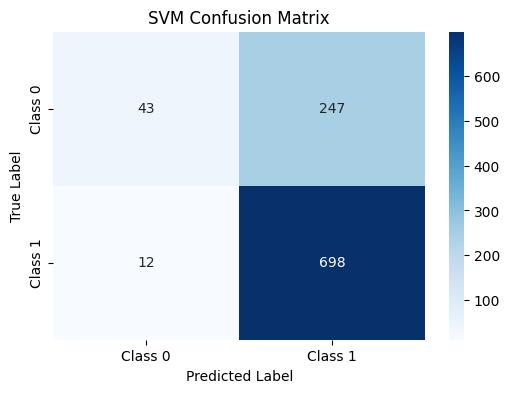

KNN Confusion Matrix:
[[ 89 201]
 [114 596]]


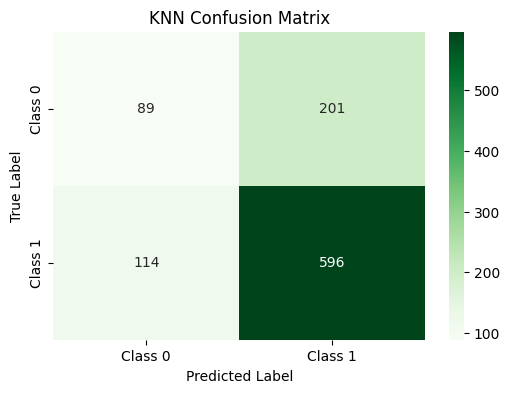

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# SVM confusion matrix
svm_cm = confusion_matrix(y_test, svm_predictions)
print("SVM Confusion Matrix:")
print(svm_cm)

# Visualizing the SVM Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"],
            yticklabels=["Class 0", "Class 1"])
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Confusion Matrix for KNN
knn_cm = confusion_matrix(y_test, knn_predictions)
print("KNN Confusion Matrix:")
print(knn_cm)

# Visualizing the KNN Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Greens', xticklabels=["Class 0", "Class 1"],
            yticklabels=["Class 0", "Class 1"])
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Load the trained SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)


def predict_article(article_text):

    processed_features = np.array([0, 0, 0, 0, 0, 0])

    # Scale the features using the same scaler used for training
    scaler = StandardScaler()
    processed_features = scaler.fit_transform([processed_features])


    # Predict using the trained SVM model
    prediction = svm_model.predict(processed_features)

    return "True" if prediction[0] == 1 else "False"

# Get input from the user
article = input("Enter the article text: ")

# Make the prediction
predicted_label = predict_article(article)
print(f"Predicted label: {predicted_label}")

Enter the article text: ‘అబ్ కీ బార్.. కిసాన్ సర్కార్’’ నినాదంతో మహారాష్ట్రలో అడుగుపెట్టింది భారత రాష్ట్ర సమితి.  నిరుడు మహారాష్ట్రలో వివిధ ప్రాంతాల్లో నిర్వహించిన సభల్లో ఇదే నినాదాన్ని వినిపించారు పార్టీ అధినేత కేసీఆర్.  మహారాష్ట్రలో బలంగా ఉన్న ఎన్సీపీ, శివసేన, కాంగ్రెస్, బీజేపీ వంటి ప్రధాన పార్టీలకు సవాల్ విసిరేలా బలప్రదర్శన చేశారు.  ‘‘మేం మహారాష్ట్రలో ఇప్పుడిప్పుడే అడుగులు వేస్తున్నాం. మాపై ఇంత ఆక్రోశం ఎందుకో నాకు అర్థం కావడం లేదు. ఇంత చిన్న పార్టీపై మిగిలిన పార్టీలు ఎందుకు ఇంత కంగారు పడుతున్నాయి’’ అంటూ నిరుడు జూన్‌లో పండరిపూర్‌లో జరిగిన సభలో కేసీఆర్ అన్నారు.  తీరా, ఇప్పుడు మహారాష్ట్రలో జరుగుతున్న అసెంబ్లీ ఎన్నికల్లో భారత రాష్ట్ర సమితి (బీఆర్‌ఎస్) పోటీకి దూరంగా ఉండిపోయింది. కీలక నేతలందరూ రాజీనామా చేసి వేరే పార్టీల్లోకి వెళ్లిపోయారు.
Predicted label: True


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
